In [1]:
%matplotlib inline
import numpy as np
from mnist_data_loader import MnistDataloader
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../data/mnist'
training_images_filepath = (f'{input_path}/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = (f'{input_path}/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = (f'{input_path}/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = (f'{input_path}/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)
plt.show()

KeyboardInterrupt: 

In [ ]:
print(len(y_train))

60000


In [ ]:
x_tr = np.array(x_train).reshape(len(x_train), -1).T / 255.0
x_tt = np.array(x_test).reshape(len(x_test), -1).T / 255.0
y_tr = np.array(y_train).reshape(len(y_train), -1).T
y_tt = np.array(y_test).reshape(len(y_test), -1).T

print(y_tr[:, :10].shape)

(1, 10)


In [ ]:
# se quiere hacer una red neuronal de dos capas, de 10 neuronas cada una; la capa de entrada es de 784 neuronas

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) - 0.5

    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10,1) - 0.5

    return W1, b1, W2, b2


def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return (x > 0).astype(int)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exps / np.sum(exps, axis=0, keepdims=True)

def forward_pass(W1,b1,W2,b2,x):
    z1 = W1.dot(x) + b1
    a1 = relu(z1)
    z2 = W2.dot(a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1                     # one_hot_Y[i, Y[i]] = 1
    one_hot_Y = one_hot_Y.T

    return one_hot_Y


def back_propagation(z1,a1,W2,a2,x,Y):
    p = Y.size
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dW2 = 1/p * dz2.dot(a1.T)           # se calcula el promedio de las derivadas para cada muestra
    db2 = 1/p * np.sum(dz2, 1)
    dz1 = W2.T.dot(dz2) * d_relu(z1)
    dW1 = 1/p * dz1.dot(x.T)
    db1 = 1/p * np.sum(dz1, 1)

    return dW1, db1, dW2, db2


def grad_desc(W1, b1, W2, b2, dW1, db1, dW2, db2, mu):
    W1 = W1 - mu*dW1
    b1 = b1 - mu*db1.reshape((10, 1))
    W2 = W2 - mu*dW2
    b2 = b2 - mu*db2.reshape((10, 1))

    return W1, b1, W2, b2

def cross_entropy(x, y):
    return sum(-np.log(x[np.arange(y.size), y]))

def get_prediction(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(pred, y):
    return np.sum(pred == y)/y.size


In [ ]:
# proceso de entrenamiento

it_b = 30
batch_size = 1000
mu = 0.1

cant_batches = y_tr.size//batch_size

W1, b1, W2, b2 = init_params()

for i in range(cant_batches):
    for k in range(it_b):
        z1, a1, z2, a2 = forward_pass(W1, b1, W2, b2, x_tr[:,i*batch_size : (i+1)*batch_size])
        dW1, db1, dW2, db2 = back_propagation(z1, a1, W2, a2, x_tr[:,i*batch_size : (i+1)*batch_size], y_tr[:, i*batch_size : (i+1)*batch_size])
        W1, b1, W2, b2 = grad_desc(W1, b1, W2, b2, dW1, db1, dW2, db2, mu)

        if (k%10 == 0):
            print (f'iteración:{k+1}; {i+1} de {cant_batches} batches')
            print ("presición: ", get_accuracy(get_prediction(a2), y_tr[:,i*batch_size : (i+1)*batch_size]))

np.savez("param.npz", w1=W1, b1=b1, w2=W2, b2=b2)

NameError: name 'y_tr' is not defined

In [ ]:
ind = 530

x1 = x_tt[:,ind].reshape(784,1)
y1 = y_tt[0,ind]

data = np.load("param.npz")

plt.imshow(x_test[ind])
plt.show()

W1 = data['w1']
b1 = data['b1']
W2 = data['w2']
b2 = data['b2']

z1, a1, z2, a2 = forward_pass(W1, b1, W2, b2, x1)

print(get_prediction(a2))
print(y1)

NameError: name 'x_tt' is not defined

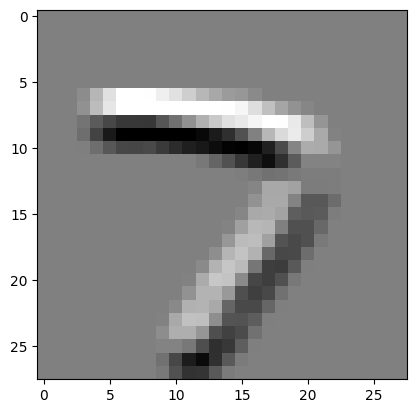

In [ ]:
from cnn import kernel

ind = 17

x1 = np.array(x_test[ind])
ker1 = [[-1, 0, 1],
       [-1, 0, 1],
       [-1, 0, 1]]

ker2 = [[-1,-1,-1],
        [0, 0, 0],
        [1, 1, 1]]

k = kernel(ker2)
conv_x1 = k.conv(x1, padding=1)

plt.imshow(conv_x1, cmap='gray')
plt.show()


In [ ]:
from cnn import cnn

